
--- TEXT SIZE: 500 ---
Naive     found at: [25, 55, 79, 277, 414]
KMP       found at: [25, 55, 79, 277, 414]
Rabin-Karp found at: [25, 55, 79, 277, 414]

--- TEXT SIZE: 1000 ---
Naive     found at: [0, 139, 396, 927, 971]
KMP       found at: [0, 139, 396, 927, 971]
Rabin-Karp found at: [0, 139, 396, 927, 971]

--- TEXT SIZE: 4000 ---
Naive     found at: [516, 645, 1615, 2236, 3623]
KMP       found at: [516, 645, 1615, 2236, 3623]
Rabin-Karp found at: [516, 645, 1615, 2236, 3623]

--- TEXT SIZE: 6000 ---
Naive     found at: [1022, 1577, 2987, 3733, 4463, 5383]
KMP       found at: [1022, 1577, 2987, 3733, 4463, 5383]
Rabin-Karp found at: [1022, 1577, 2987, 3733, 4463, 5383]

--- TEXT SIZE: 10000 ---
Naive     found at: [2861, 4090, 4111, 4487, 5181]
KMP       found at: [2861, 4090, 4111, 4487, 5181]
Rabin-Karp found at: [2861, 4090, 4111, 4487, 5181]


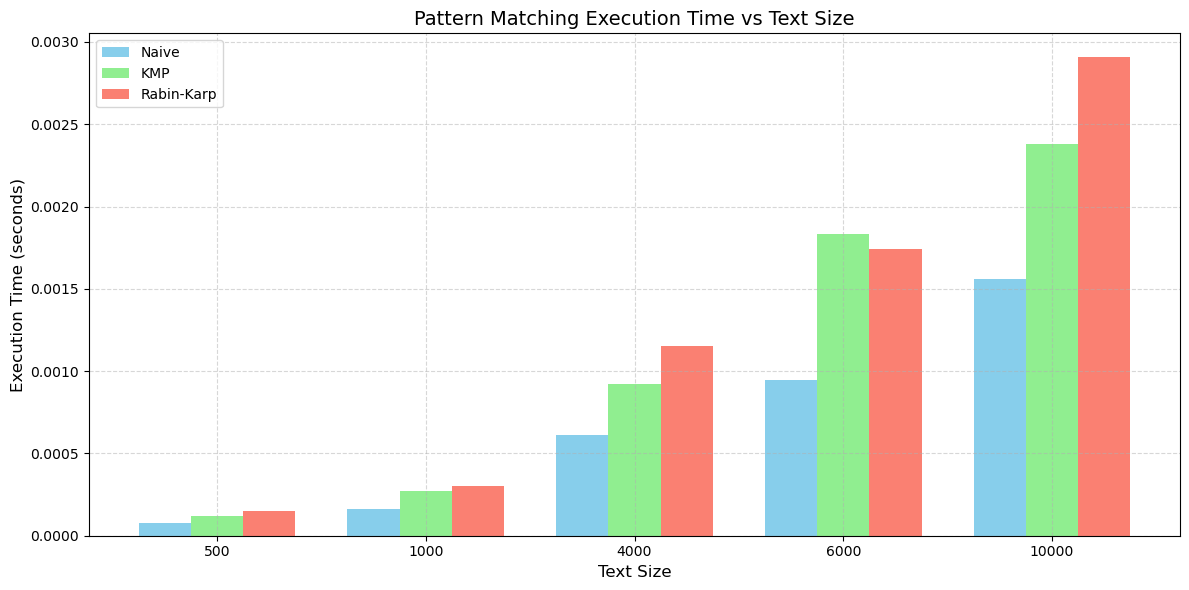

In [1]:
import time
import random
import string
import matplotlib.pyplot as plt
import numpy as np

# -------------------- Search Algorithms --------------------

def naive_search(pattern, text):
    positions = []
    for i in range(len(text) - len(pattern) + 1):
        if text[i:i+len(pattern)] == pattern:
            positions.append(i)
    return positions

def compute_lps(pattern):
    lps = [0] * len(pattern)
    length = 0
    i = 1
    while i < len(pattern):
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

def kmp_search(pattern, text):
    lps = compute_lps(pattern)
    positions = []
    i = j = 0
    while i < len(text):
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == len(pattern):
            positions.append(i - j)
            j = lps[j - 1]
        elif i < len(text) and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return positions

def rabin_karp_search(pattern, text, q=101):
    d = 256
    m = len(pattern)
    n = len(text)
    p = 0
    t = 0
    h = 1
    positions = []

    for i in range(m - 1):
        h = (h * d) % q

    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    for i in range(n - m + 1):
        if p == t:
            if text[i:i + m] == pattern:
                positions.append(i)
        if i < n - m:
            t = (d * (t - ord(text[i]) * h) + ord(text[i + m])) % q
            if t < 0:
                t = t + q
    return positions

# -------------------- Generate Inputs --------------------

def generate_random_text(length, pattern):
    text = ''.join(random.choices(string.ascii_lowercase, k=length))
    insert_positions = [random.randint(0, length - len(pattern)) for _ in range(5)]
    for pos in insert_positions:
        text = text[:pos] + pattern + text[pos + len(pattern):]
    return text

pattern = "abc"
text_sizes = [500, 1000, 4000, 6000, 10000]

naive_times = []
kmp_times = []
rk_times = []

# -------------------- Run & Output --------------------

for size in text_sizes:
    print(f"\n--- TEXT SIZE: {size} ---")
    text = generate_random_text(size, pattern)

    start = time.time()
    naive_pos = naive_search(pattern, text)
    naive_times.append(time.time() - start)

    start = time.time()
    kmp_pos = kmp_search(pattern, text)
    kmp_times.append(time.time() - start)

    start = time.time()
    rk_pos = rabin_karp_search(pattern, text)
    rk_times.append(time.time() - start)

    print(f"Naive     found at: {naive_pos}")
    print(f"KMP       found at: {kmp_pos}")
    print(f"Rabin-Karp found at: {rk_pos}")

# -------------------- Plot Graph --------------------

bar_width = 0.25
r1 = np.arange(len(text_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, naive_times, color='skyblue', width=bar_width, label='Naive')
plt.bar(r2, kmp_times, color='lightgreen', width=bar_width, label='KMP')
plt.bar(r3, rk_times, color='salmon', width=bar_width, label='Rabin-Karp')

plt.xlabel('Text Size', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.title('Pattern Matching Execution Time vs Text Size', fontsize=14)
plt.xticks([r + bar_width for r in range(len(text_sizes))], text_sizes)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

